# AI 1 Exercise 2: "Introduction to Python"

## 2.2 Titanic

#### a) First, you import the csv file into a dataframe.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### b) You select the columns with rather high explanatory power for “survived” by using your personal logic. Then, you evaluate your logic by having a look at a correlation table. What does it tell you?

In [41]:
# Data Selection
data_selected = data[['Survived','Sex', 'Age','Pclass','SibSp','Parch','Fare']]

In [42]:
# Get Correlation Table
data_selected.corr()

,Survived,Age,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.338481,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.369226,-0.308247,-0.189119,0.096067
Pclass,-0.338481,-0.369226,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.035322,-0.308247,0.083081,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.018443,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,-0.549500,0.159651,0.216225,1.000000


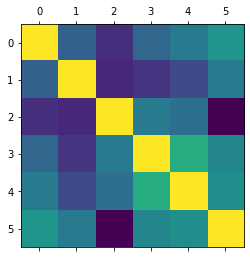

In [45]:
# Optional: You can also visualize the correlation matrix
plt.matshow(data_selected.corr())
plt.show()

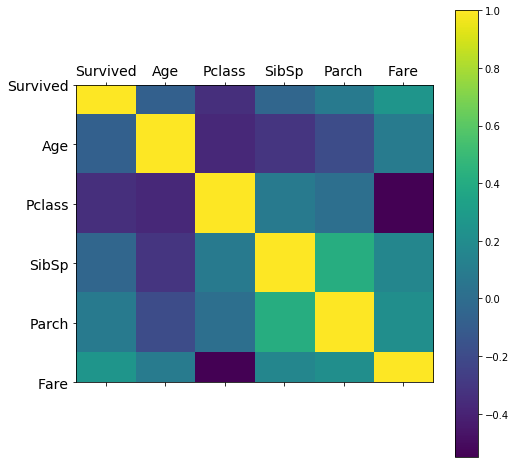

In [47]:
# More fancy version of the visualization:
data_selected = data[['Survived', 'Age','Pclass','SibSp','Parch','Fare']]
f = plt.figure(figsize=(8, 8))
plt.matshow(data_selected.corr(), fignum=f.number)
plt.xticks(range(data_selected.shape[1]), data_selected.columns, fontsize=14)
plt.yticks(range(data_selected.shape[1]), data_selected.columns, fontsize=14)
cb = plt.colorbar()

#### c) Now, you are trying to comprehend the quality of the data again. How many missing attribute values are there? You decide to fill missing values with the respective column average values.

In [54]:
data_selected = data[['Survived','Sex', 'Age','Pclass','SibSp','Parch','Fare']]
print(data_selected.isnull().sum())

data2 = data_selected.fillna(data_selected.mean())
print(data2.isnull().sum())

data2

Survived      0
Sex           0
Age         177
Pclass        0
SibSp         0
Parch         0
Fare          0
dtype: int64
Survived    0
Sex         0
Age         0
Pclass      0
SibSp       0
Parch       0
Fare        0
dtype: int64


,Survived,Sex,Age,Pclass,SibSp,Parch,Fare
0,0,male,22.000000,3,1,0,7.2500
1,1,female,38.000000,1,1,0,71.2833
2,1,female,26.000000,3,0,0,7.9250
3,1,female,35.000000,1,1,0,53.1000
4,0,male,35.000000,3,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,male,27.000000,2,0,0,13.0000
887,1,female,19.000000,1,0,0,30.0000
888,0,female,29.699118,3,1,2,23.4500
889,1,male,26.000000,1,0,0,30.0000


#### d) You create a pivot chart indicating the means of “Age” and “Sex” depending on survival.

In [56]:
data2['Sex'].replace(['male','female'],[1,0],inplace=True)
data2.pivot_table(index='Survived',values=['Age','Sex'],aggfunc='mean')

,Age,Sex
Survived,,
0,30.415100,0.852459
1,28.549778,0.318713


#### e) Lastly, you perform binning for “Age” again by defining the intervals manually (use the bin sizes of Exercise 1.3). Add the binned values as a new column to your dataset. Compute the correlation with “survived” and compare the binned age with the numeric age.

In [60]:
intervals = [(0,16),(16,50),(50,100)]
bins = pd.IntervalIndex.from_tuples(intervals)
age_cat = pd.cut(data2["Age"], bins)
data2["age_cat"] = age_cat
data2['age_category'] = data2.age_cat.cat.codes
# data2['age_cat'].replace(['(0, 16]','(16, 50]','(50, 100]'],[1,2,3],inplace=True)  # alternative to the code above

data2

,Survived,Sex,Age,Pclass,SibSp,Parch,Fare,age_cat,age_category
0,0,1,22.000000,3,1,0,7.2500,"(16, 50]",1
1,1,0,38.000000,1,1,0,71.2833,"(16, 50]",1
2,1,0,26.000000,3,0,0,7.9250,"(16, 50]",1
3,1,0,35.000000,1,1,0,53.1000,"(16, 50]",1
4,0,1,35.000000,3,0,0,8.0500,"(16, 50]",1
...,...,...,...,...,...,...,...,...,...
886,0,1,27.000000,2,0,0,13.0000,"(16, 50]",1
887,1,0,19.000000,1,0,0,30.0000,"(16, 50]",1
888,0,0,29.699118,3,1,2,23.4500,"(16, 50]",1
889,1,1,26.000000,1,0,0,30.0000,"(16, 50]",1
